<a href="https://colab.research.google.com/github/Nancy-Shi/Complex_Networks/blob/main/061323_Configuration_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Configuration Model** 
The model randomly assigns edges based on the degree sequence. 

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

In [13]:
## sequence returns a degree sequence for a tree with a power law distribution.
## random_powerlaw_tree_sequence(n, gamma=3, seed=None, tries=100)
## n is number of nodes, gamma is the exponent of the power law, 
## tries is the number of attempts to adjust the sequence to make it a tree.

sequence = nx.random_powerlaw_tree_sequence(100, tries = 5000)
G = nx.configuration_model(sequence)

In [9]:
len(G)

100

In [10]:
actual_degrees = [d for v, d in G.degree()]

In [11]:
actual_degrees == sequence

True

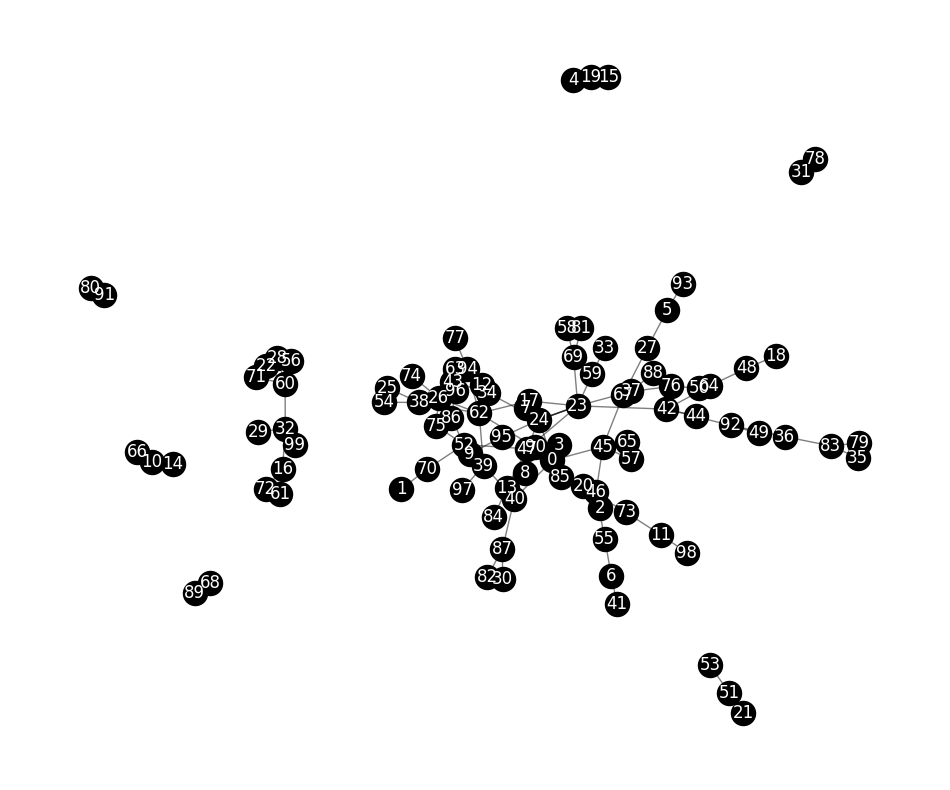

In [12]:
pos = nx.fruchterman_reingold_layout(G);

plt.figure(figsize=(12,10));
plt.axis("off");
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="black");
nx.draw_networkx_edges(G, pos, alpha=0.500);
nx.draw_networkx_labels(G, pos, font_color="white");
plt.show();

In [15]:
## Build my own configuration model
import numpy as np

def generate_degree_sequence(n, gamma, kmin):
    """
    Generates a degree sequence of length n following a power law distribution.

    Parameters:
        n (int): Length of the degree sequence.
        gamma (float): Exponent of the power law distribution (gamma > 1).
        kmin (int): Minimum degree value in the sequence.

    Returns:
        list: Degree sequence following a power law distribution.
    """

    # Generate a random sample from the power law distribution 
    # by mapping the uniform distribution to power law distribution
    u = np.random.uniform(size=n)
    degrees = np.ceil((1.0 - u) ** (-1.0 / (gamma - 1.0)))

    # Adjust degrees based on the minimum degree value (kmin)
    degrees = [int(degree) for degree in degrees if degree >= kmin]

    # Truncate or pad the sequence to match the desired length
    degrees = degrees[:n] if len(degrees) >= n else degrees + [kmin] * (n - len(degrees))

    return degrees


Degree sequence: [3, 6, 3, 3, 3, 3, 3, 3, 3, 3]
Average degree: 3.3


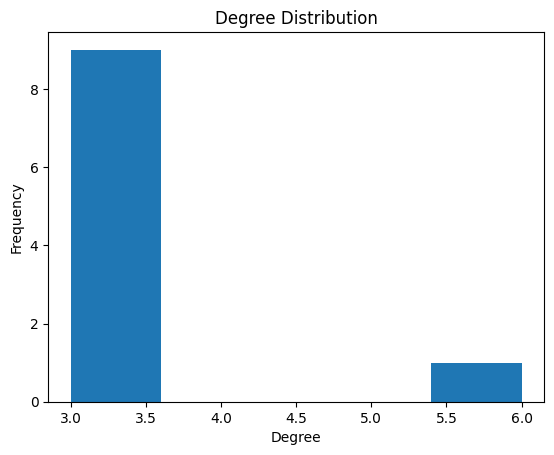

In [18]:
## Test 1:
n = 10 
gamma = 2.5  
kmin = 3 

degree_sequence = generate_degree_sequence(n, gamma, kmin)
print("Degree sequence:", degree_sequence)

# Calculate and print the average degree
average_degree = sum(degree_sequence) / n
print("Average degree:", average_degree)

# Plot the degree distribution histogram
import matplotlib.pyplot as plt
plt.hist(degree_sequence, bins='auto')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.show()

Degree sequence: [3, 3, 3, 6, 5, 5, 8, 7, 3, 5, 5, 3, 3, 5, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Average degree: 3.933333333333333


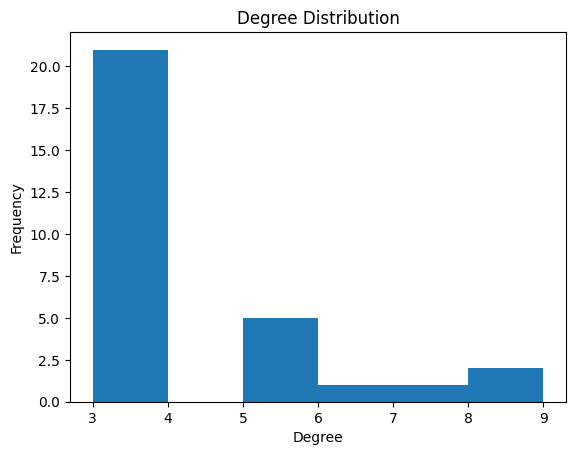

In [19]:
## Test 2:
n = 30
gamma = 2.3  
kmin = 3 

degree_sequence = generate_degree_sequence(n, gamma, kmin)
print("Degree sequence:", degree_sequence)

# Calculate and print the average degree
average_degree = sum(degree_sequence) / n
print("Average degree:", average_degree)

# Plot the degree distribution histogram
import matplotlib.pyplot as plt
plt.hist(degree_sequence, bins='auto')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.show()

Degree sequence: [3, 5, 13, 3, 3, 4, 4, 4, 8, 5, 8, 19, 4, 4, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Average degree: 3.96


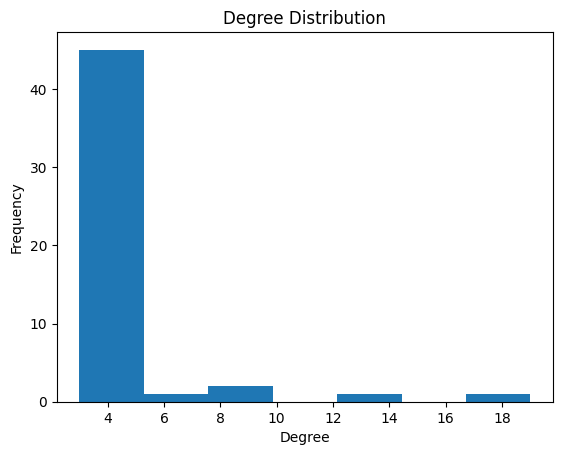

In [21]:
## Test 3:
n = 50 
gamma = 2.6 
kmin = 3 

degree_sequence = generate_degree_sequence(n, gamma, kmin)
print("Degree sequence:", degree_sequence)

# Calculate and print the average degree
average_degree = sum(degree_sequence) / n
print("Average degree:", average_degree)

# Plot the degree distribution histogram
import matplotlib.pyplot as plt
plt.hist(degree_sequence, bins='auto')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.show()

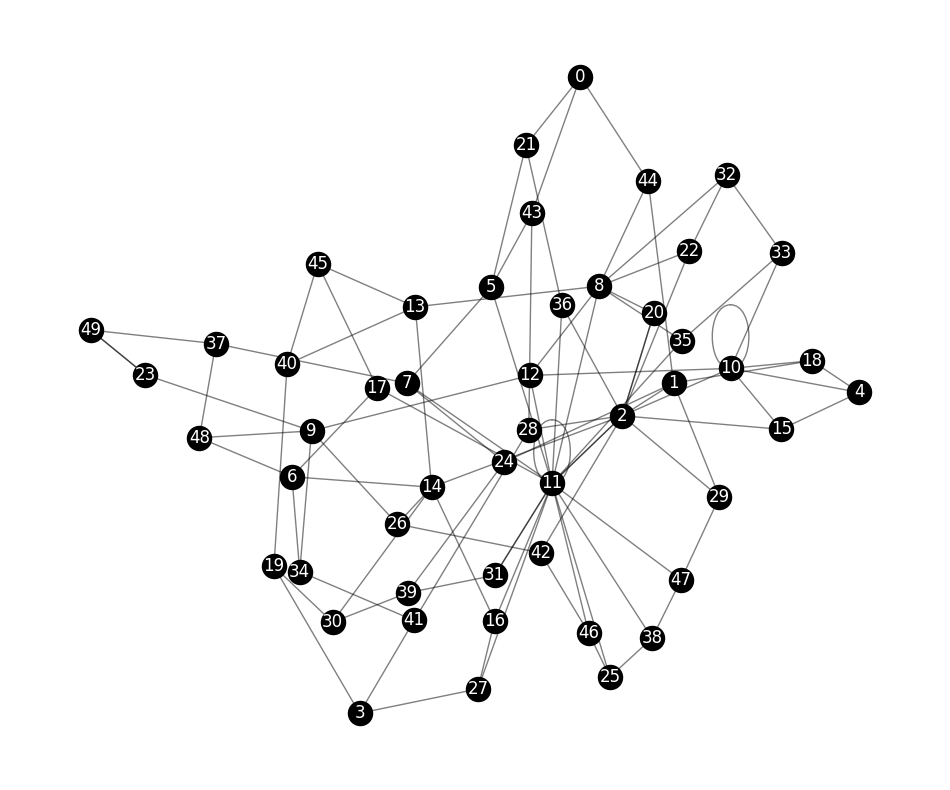

True

In [23]:
G2 = nx.configuration_model(degree_sequence)
pos = nx.fruchterman_reingold_layout(G2);

plt.figure(figsize=(12,10));
plt.axis("off");
nx.draw_networkx_nodes(G2, pos, node_size=300, node_color="black");
nx.draw_networkx_edges(G2, pos, alpha=0.500);
nx.draw_networkx_labels(G2, pos, font_color="white");
plt.show();

actual_degrees2 = [d for v, d in G2.degree()]
actual_degrees2 == degree_sequence

In [71]:
import random
import networkx as nx

def generate_configuration_model(degree_sequence):
    """
    Generates a random graph based on the input of a degree sequence

    It checks if the sum of degrees is odd and, if so, adjusts the 
    degree sequence by increasing the degree of a node with an odd 
    degree. The function then constructs the graph using the 
    modified degree sequence. 

    """
    # Create an empty graph
    G = nx.Graph()

    # Calculate the sum of degrees
    degree_sum = sum(degree_sequence)

    # Adjust the degree sequence if the sum is odd
    if degree_sum % 2 != 0:
        for i in range(len(degree_sequence)):
            if degree_sequence[i] % 2 != 0:
                degree_sequence[i] += 1
                break

    # Create a list of labels based on the degree sequence
    labels = []
    for node, degree in enumerate(degree_sequence):
        labels.extend([node] * degree)
    print(labels)
    
    # Randomly shuffle the labels
    random.shuffle(labels)

    # Pair the lables and add edges to the graph
    while len(labels)>0:
        print(labels)
        node1 = labels.pop()
        node2 = labels.pop()
        G.add_edge(node1, node2)

    return G

[0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14]
[14, 8, 4, 2, 4, 3, 4, 4, 2, 4, 1, 9, 0, 2, 7, 12, 4, 4, 10, 3, 4, 10, 2, 4, 7, 4, 6, 11, 2, 13, 4, 4, 4, 5, 13, 3, 8, 4, 2, 1, 13, 11, 8, 10, 2, 4, 7, 4, 1, 4, 4, 0, 14, 2, 4, 5, 12, 4, 4, 5, 2, 6, 9, 4, 6, 14, 4, 0, 4, 12, 4, 4, 9, 11]
[14, 8, 4, 2, 4, 3, 4, 4, 2, 4, 1, 9, 0, 2, 7, 12, 4, 4, 10, 3, 4, 10, 2, 4, 7, 4, 6, 11, 2, 13, 4, 4, 4, 5, 13, 3, 8, 4, 2, 1, 13, 11, 8, 10, 2, 4, 7, 4, 1, 4, 4, 0, 14, 2, 4, 5, 12, 4, 4, 5, 2, 6, 9, 4, 6, 14, 4, 0, 4, 12, 4, 4]
[14, 8, 4, 2, 4, 3, 4, 4, 2, 4, 1, 9, 0, 2, 7, 12, 4, 4, 10, 3, 4, 10, 2, 4, 7, 4, 6, 11, 2, 13, 4, 4, 4, 5, 13, 3, 8, 4, 2, 1, 13, 11, 8, 10, 2, 4, 7, 4, 1, 4, 4, 0, 14, 2, 4, 5, 12, 4, 4, 5, 2, 6, 9, 4, 6, 14, 4, 0, 4, 12]
[14, 8, 4, 2, 4, 3, 4, 4, 2, 4, 1, 9, 0, 2, 7, 12, 4, 4, 10, 3, 4, 1

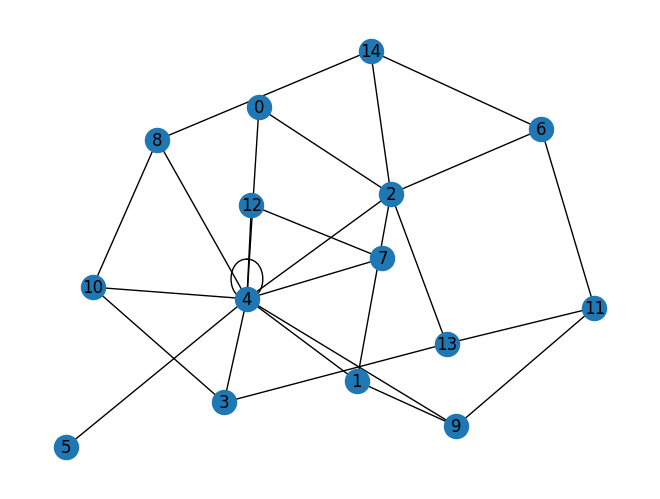

In [73]:
degree_sequence = generate_degree_sequence(15, 2.5, 3)

G = generate_configuration_model(degree_sequence)

# Print the resulting graph's degree sequence
print("Degree sequence:", list(G.degree()))

# draw the graph
nx.draw(G, with_labels=True)
plt.show()